###  CUSTOMER SEGMENTATION WITH PCA AND CLUSTERING.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [3]:
data = pd.read_csv('cleaned_marketing.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [5]:
# generate age and length of patronage columns.

data['age'] = 2025- data['Year_Birth']

data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['length_of_patronage'] = [2025-x.year for x in data['Dt_Customer']]

data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,length_of_patronage
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,68,13
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,71,11
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,60,12
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,41,11
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,44,11


In [7]:
data.drop(columns=['ID','Year_Birth','Dt_Customer'], inplace=True) # drop redundant columns
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,length_of_patronage
0,Graduation,Single,58138,0,0,58,635,88,546,172,...,0,0,0,0,0,3,11,1,68,13
1,Graduation,Single,46344,1,1,38,11,1,6,2,...,0,0,0,0,0,3,11,0,71,11
2,Graduation,Together,71613,0,0,26,426,49,127,111,...,0,0,0,0,0,3,11,0,60,12
3,Graduation,Together,26646,1,0,26,11,4,20,10,...,0,0,0,0,0,3,11,0,41,11
4,PhD,Married,58293,1,0,94,173,43,118,46,...,0,0,0,0,0,3,11,0,44,11


In [15]:
data = data[data['Income'] != " "].copy()
data.reset_index(drop=True, inplace=True)

data['Income'] = pd.to_numeric(data["Income"])
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,length_of_patronage
0,Graduation,Single,58138,0,0,58,635,88,546,172,...,0,0,0,0,0,3,11,1,68,13
1,Graduation,Single,46344,1,1,38,11,1,6,2,...,0,0,0,0,0,3,11,0,71,11
2,Graduation,Together,71613,0,0,26,426,49,127,111,...,0,0,0,0,0,3,11,0,60,12
3,Graduation,Together,26646,1,0,26,11,4,20,10,...,0,0,0,0,0,3,11,0,41,11
4,PhD,Married,58293,1,0,94,173,43,118,46,...,0,0,0,0,0,3,11,0,44,11


In [21]:
# handle the categorical variable

data['Education'] = [
    'ssce' if x == '2n Cycle' else 'primary' if x == 'Basic'
    else 'Bsc' if x == 'Graduation' else x for x in data['Education']
]

single = ['Alone','Absurd', 'YOLO', 'Single']
data['Marital_Status'] = ['Single' if x in single else x for x in data['Marital_Status']]
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,length_of_patronage
0,Bsc,Single,58138,0,0,58,635,88,546,172,...,0,0,0,0,0,3,11,1,68,13
1,Bsc,Single,46344,1,1,38,11,1,6,2,...,0,0,0,0,0,3,11,0,71,11
2,Bsc,Together,71613,0,0,26,426,49,127,111,...,0,0,0,0,0,3,11,0,60,12
3,Bsc,Together,26646,1,0,26,11,4,20,10,...,0,0,0,0,0,3,11,0,41,11
4,PhD,Married,58293,1,0,94,173,43,118,46,...,0,0,0,0,0,3,11,0,44,11


In [23]:
encoder = LabelEncoder()
clean_data = data.copy()
for columns in list(data.select_dtypes(include='object').columns):
    data[columns] = encoder.fit_transform(data[columns])

data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,length_of_patronage
0,0,2,58138,0,0,58,635,88,546,172,...,0,0,0,0,0,3,11,1,68,13
1,0,2,46344,1,1,38,11,1,6,2,...,0,0,0,0,0,3,11,0,71,11
2,0,3,71613,0,0,26,426,49,127,111,...,0,0,0,0,0,3,11,0,60,12
3,0,3,26646,1,0,26,11,4,20,10,...,0,0,0,0,0,3,11,0,41,11
4,2,1,58293,1,0,94,173,43,118,46,...,0,0,0,0,0,3,11,0,44,11


### PCA

In [28]:
# scale the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X=data)

# perform PCA
pca_model = PCA(n_components=3, random_state=23)
pca_data = pca_model.fit_transform(X=scaled_data)
pca_data = pd.DataFrame(data=pca_data, columns=['col1','col2','col3'])
pca_data.head()

,col1,col2,col3
0,3.852167,0.525953,-0.049894
1,-2.402658,-0.260804,-0.492677
2,1.654988,-0.014776,-1.120996
3,-2.529427,-1.620360,-0.009133
4,-0.540181,-0.440826,-0.672760


#### Modelling

In [29]:
model = KMeans(n_clusters=4, n_init='auto')
model.fit(X=pca_data)
predictions = model.labels_
predictions

array([2, 3, 2, ..., 2, 2, 3], shape=(2216,), dtype=int32)

In [31]:
clean_data['clusters'] = [f'cluster_{x}' for x in predictions]
clean_data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,length_of_patronage,clusters
0,Bsc,Single,58138,0,0,58,635,88,546,172,...,0,0,0,0,3,11,1,68,13,cluster_2
1,Bsc,Single,46344,1,1,38,11,1,6,2,...,0,0,0,0,3,11,0,71,11,cluster_3
2,Bsc,Together,71613,0,0,26,426,49,127,111,...,0,0,0,0,3,11,0,60,12,cluster_2
3,Bsc,Together,26646,1,0,26,11,4,20,10,...,0,0,0,0,3,11,0,41,11,cluster_3
4,PhD,Married,58293,1,0,94,173,43,118,46,...,0,0,0,0,3,11,0,44,11,cluster_3


In [33]:
import plotly.express as px

px.scatter_3d(data_frame=pca_data, x='col1', y='col2', z='col3',
              color=predictions)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'col1=%{x}<br>col2=%{y}<br>col3=%{z}<br>color=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': {'bdata': ('AgAAAAMAAAACAAAAAwAAAAMAAAAAAA' ... 'AAAgAAAAAAAAACAAAAAgAAAAMAAAA='),
                                   'dtype': 'i4'},
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'x': {'bdata': ('2HL63jzRDkAiZci4pDgDwKkZGpbUev' ... 'G/tPY/Wm2NDlh9+z8O0aCOjpj6vw=='),
                    'dtype': 'f8'},
              'y': {'bdata': ('3U0hWJrU4D8xrt9oArHQv3xyW8KtQo' ... '9Lu9K/P4fdeZ4Q5z+qziCNAYryPw=='),
                    'dtype': 'f8'},
              'z': {'bdata': ('LzGLy7CLqb/gUkhpA4jfv0kqvuWZ7/' ... 'tTTeg/gTwoEPE+9r8d9q6vvc/zPw=='),
                    'dtype': 'f8'}}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'color'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'xaxis': {'title': {'text': 'col1'}},
                         'yaxis': {'title': {'text': 'col2'}},
                         'zaxis': {'title': {'text': 'col3'}}},
               'template': '...'}
})

In [34]:
clean_data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,length_of_patronage,clusters
0,Bsc,Single,58138,0,0,58,635,88,546,172,...,0,0,0,0,3,11,1,68,13,cluster_2
1,Bsc,Single,46344,1,1,38,11,1,6,2,...,0,0,0,0,3,11,0,71,11,cluster_3
2,Bsc,Together,71613,0,0,26,426,49,127,111,...,0,0,0,0,3,11,0,60,12,cluster_2
3,Bsc,Together,26646,1,0,26,11,4,20,10,...,0,0,0,0,3,11,0,41,11,cluster_3
4,PhD,Married,58293,1,0,94,173,43,118,46,...,0,0,0,0,3,11,0,44,11,cluster_3


<Axes: xlabel='clusters', ylabel='Income'>

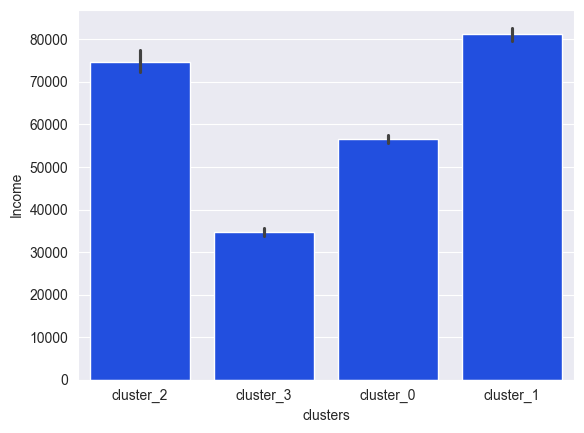

In [35]:
sns.set_style('darkgrid')
sns.set_palette('bright')


sns.barplot(data=clean_data, x='clusters', y="Income")

<Axes: xlabel='clusters', ylabel='MntWines'>

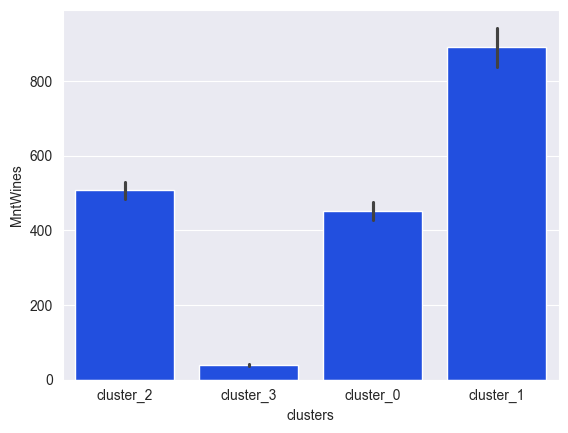

In [36]:
sns.barplot(data=clean_data, x='clusters', y="MntWines")

In [44]:
clean_data['no_of_children'] = clean_data['Kidhome'] + clean_data['Teenhome']


In [43]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,length_of_patronage,no_of_children
0,0,2,58138,0,0,58,635,88,546,172,...,0,0,0,0,3,11,1,68,13,0
1,0,2,46344,1,1,38,11,1,6,2,...,0,0,0,0,3,11,0,71,11,2
2,0,3,71613,0,0,26,426,49,127,111,...,0,0,0,0,3,11,0,60,12,0
3,0,3,26646,1,0,26,11,4,20,10,...,0,0,0,0,3,11,0,41,11,1
4,2,1,58293,1,0,94,173,43,118,46,...,0,0,0,0,3,11,0,44,11,1


<Axes: xlabel='clusters', ylabel='no_of_children'>

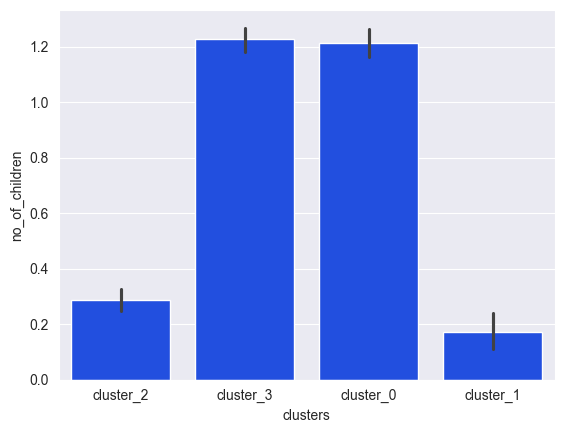

In [45]:
sns.barplot(data=clean_data, x='clusters', y="no_of_children")